### Forest Fire Risk Prediction
#### 23048573_ArchanaGiri

In [3]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn openpyxl
print("All libraries installed")

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.1 MB/s eta 0:00:34
    --------------------------------------- 1.3/72.0 MB 2.4 MB/s eta 0:00:30
   - -------------------------------------- 1.8/72.0 MB 2.5 MB/s eta 0:00:28
   - -------------------------------------- 2.4/72.0 MB 2.6 MB/s eta 0:00:27
   - -------------------------------------- 3.1/72.0 MB 2.6 MB/s eta 0:00:27
   -- ------------------------------------- 3.7/72.0 MB 2.7 MB/s eta 0:00:26
   -- ------------------------------------- 4.5/72.0 MB 2.9 MB/s eta 0:00:24
   -- ------------------------------------- 5.2/72.0 MB 3.0 MB/s eta 0:00:23
   --- ------------------------------------ 6.0/72.0 MB 3.0 MB/s eta 0:00:22
   --- ------------------------------------ 6.6/72.0 MB 3.0 MB/s eta 0:00:22
   ---- ----------------------------------- 7.3/72.0 MB 3.1 MB/s eta 0:00:21
   ---- -----

#### Import all usefull libraries

In [6]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Libraries imported successfully!")

Libraries imported successfully!


#### Load Dataset 

In [10]:
file_path='ForestFire.csv'
df=pd.read_csv(file_path)
print("Dataset Loded Successfully")

Dataset Loded Successfully


In [12]:
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()


Dataset has 2812 rows and 12 columns

First 5 rows:


,Time (NPT),MaximumTemperature,MinimumTemperature,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected area,Credibility,Latitude,Longitude
0,01/01/2019 00:00:00,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,NaN,82,28.00200,83.03600
1,01/02/2019 00:00:00,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,NaN,47,27.99700,83.04000
2,01/03/2019 00:00:00,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,NaN,19,27.89170,83.19279
3,01/04/2019 00:00:00,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,NaN,60,27.85710,82.87150
4,01/05/2019 00:00:00,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,NaN,41,27.85989,82.88692


#### Check dataset basic information

In [15]:
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
df.describe()


Column Names:
['Time (NPT)', 'MaximumTemperature', 'MinimumTemperature', 'Humidity', 'Province', 'District', 'Ga.Pa./No.Pa.', 'Ward', 'Protected area', 'Credibility', 'Latitude', 'Longitude']

Data Types:
Time (NPT)             object
MaximumTemperature    float64
MinimumTemperature    float64
Humidity              float64
Province               object
District               object
Ga.Pa./No.Pa.          object
Ward                    int64
Protected area         object
Credibility             int64
Latitude              float64
Longitude             float64
dtype: object

Basic Statistics:


,MaximumTemperature,MinimumTemperature,Humidity,Ward,Credibility,Latitude,Longitude
count,2506.000000,2506.000000,2507.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,31.190648,18.842382,74.311297,21.536984,61.450569,28.079700,82.407785
std,6.322765,7.057711,16.627228,36.288447,18.821184,0.264434,0.683861
min,10.400000,3.200000,22.735000,1.000000,0.000000,27.365280,81.212810
25%,27.400000,12.500000,65.050000,2.000000,49.000000,27.883535,81.847390
50%,32.800000,20.000000,79.800000,5.000000,63.000000,28.055280,82.472550
75%,35.600000,25.500000,86.355000,9.000000,75.000000,28.248603,82.901682
max,44.000000,31.800000,100.000000,99.000000,100.000000,28.816200,83.994150


### Clean dataset

In [18]:
# Check missing values
missing = df.isnull().sum()
print("\nMissing values in each column:")
print(missing[missing > 0])


Missing values in each column:
Time (NPT)             305
MaximumTemperature     306
MinimumTemperature     306
Humidity               305
Protected area        1878
dtype: int64


In [20]:
# Fill missing values
# For numbers: use median (middle value)
# For text: use most common value

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled missing values in '{col}' with median")
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled missing values in '{col}' with most common value")

print("\n No more missing values!")


Filled missing values in 'Time (NPT)' with most common value
Filled missing values in 'MaximumTemperature' with median
Filled missing values in 'MinimumTemperature' with median
Filled missing values in 'Humidity' with median
Filled missing values in 'Protected area' with most common value

 No more missing values!


In [22]:
#Removing duplicate rows
original_rows = len(df)
df = df.drop_duplicates()
removed = original_rows - len(df)

print(f"Original rows: {original_rows}")
print(f"After removing duplicates: {len(df)}")
print(f"Duplicates removed: {removed}")

if removed > 0:
    print("Duplicates removed!")
else:
    print("No duplicates found!")


Original rows: 2812
After removing duplicates: 2804
Duplicates removed: 8
Duplicates removed!


#### Rename Columns

In [40]:
df.rename(columns={
    'Time (NPT)': 'Date',
    'MaximumTemperature': 'Max_Temp',
    'MinimumTemperature': 'Min_Temp',
    'Humidity': 'Humidity',
    'Province': 'Province',
    'District': 'District',
    'Ga.Pa./No': 'Location',
    'Ward': 'Ward',
    'Protected area':'Protected_area',
    'Credibility':'Credibility',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
}, inplace=True)

print("Columns renamed!")
print(df.columns.tolist())


Columns renamed!
['Date', 'Max_Temp', 'Min_Temp', 'Humidity', 'Province', 'District', 'Ga.Pa./No.Pa.', 'Ward', 'Protected_area', 'Credibility', 'Latitude', 'Longitude']


In [42]:
df.head()

,Date,Max_Temp,Min_Temp,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected_area,Credibility,Latitude,Longitude
0,01/01/2019 00:00:00,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,Bardia National Park,82,28.00200,83.03600
1,01/02/2019 00:00:00,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,Bardia National Park,47,27.99700,83.04000
2,01/03/2019 00:00:00,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,Bardia National Park,19,27.89170,83.19279
3,01/04/2019 00:00:00,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,60,27.85710,82.87150
4,01/05/2019 00:00:00,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,41,27.85989,82.88692


#### Creating New Features

In [45]:
#Temperature Range
df['Temp_Range'] = df['Max_Temp'] - df['Min_Temp']
print("Created: Temp_Range")

#  Average Temperature
df['Temp_Avg'] = (df['Max_Temp'] + df['Min_Temp']) / 2
print("Created: Temp_Avg")

# Parse Date and extract Month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Day_of_Year'] = df['Date'].dt.dayofyear
print("Created: Month, Day_of_Year")

# Season (based on month)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
print("Created: Season")

# Drought Index (Fire risk indicator)
# Formula: Higher temperature + Lower humidity = Higher risk
df['Drought_Index'] = (df['Temp_Avg'] / 30 * 0.4 + 
                       (100 - df['Humidity']) / 100 * 0.5 + 
                       df['Temp_Range'] / 20 * 0.1) * 100

print("Created: Drought_Index")

print(f"\n All new features created!")
print(f"Dataset now has {df.shape[1]} columns")

Created: Temp_Range
Created: Temp_Avg
Created: Month, Day_of_Year
Created: Season
Created: Drought_Index

 All new features created!
Dataset now has 18 columns


In [47]:
df.head()

,Date,Max_Temp,Min_Temp,Humidity,Province,District,Ga.Pa./No.Pa.,Ward,Protected_area,Credibility,Latitude,Longitude,Temp_Range,Temp_Avg,Month,Day_of_Year,Season,Drought_Index
0,2019-01-01,22.8,6.0,73.6,Lumbini,Arghakhanchi,Bhumekasthan,4,Bardia National Park,82,28.00200,83.03600,16.8,14.40,1,1,Winter,40.800000
1,2019-01-02,23.4,4.8,86.6,Lumbini,Arghakhanchi,Bhumekasthan,6,Bardia National Park,47,27.99700,83.04000,18.6,14.10,1,2,Winter,34.800000
2,2019-01-03,22.4,4.5,87.8,Lumbini,Arghakhanchi,Panini,6,Bardia National Park,19,27.89170,83.19279,17.9,13.45,1,3,Winter,32.983333
3,2019-01-04,22.5,7.0,81.8,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,60,27.85710,82.87150,15.5,14.75,1,4,Winter,36.516667
4,2019-01-05,23.4,7.0,79.7,Lumbini,Arghakhanchi,Sitaganga,9,Bardia National Park,41,27.85989,82.88692,16.4,15.20,1,5,Winter,38.616667


#### Create Target variable

In [52]:
# Calculate Fire Weather Index
def calculate_fire_risk(row):
    # Temperature score (0-30 points)
    temp = row['Temp_Avg']
    if temp < 15:
        temp_score = 0
    elif temp < 25:
        temp_score = (temp - 15) * 2
    else:
        temp_score = 20 + min((temp - 25) * 2, 10)
    
    # Humidity score (0-40 points)
    humidity_score = (100 - row['Humidity']) * 0.4
    
    # Temperature range score (0-15 points)
    range_score = min(row['Temp_Range'] * 0.75, 15)
    
    # Drought score (0-15 points)
    drought_score = row['Drought_Index'] * 0.15
    
    # Total Fire Weather Index (0-100)
    fwi = temp_score + humidity_score + range_score + drought_score
    return max(0, min(100, fwi))

# Calculate FWI
df['Fire_Weather_Index'] = df.apply(calculate_fire_risk, axis=1)

# Create Risk Labels
def classify_risk(fwi):
    if fwi < 25:
        return 'Low', 0
    elif fwi < 50:
        return 'Moderate', 1
    elif fwi < 75:
        return 'High', 2
    else:
        return 'Extreme', 3

df[['Risk_Level', 'Risk_Code']] = df['Fire_Weather_Index'].apply(
    lambda x: pd.Series(classify_risk(x))
)

print("Fire Risk Labels Created!")


Fire Risk Labels Created!



 Risk Distribution:
Risk_Level
Moderate    1331
High        1001
Low          319
Extreme      153
Name: count, dtype: int64


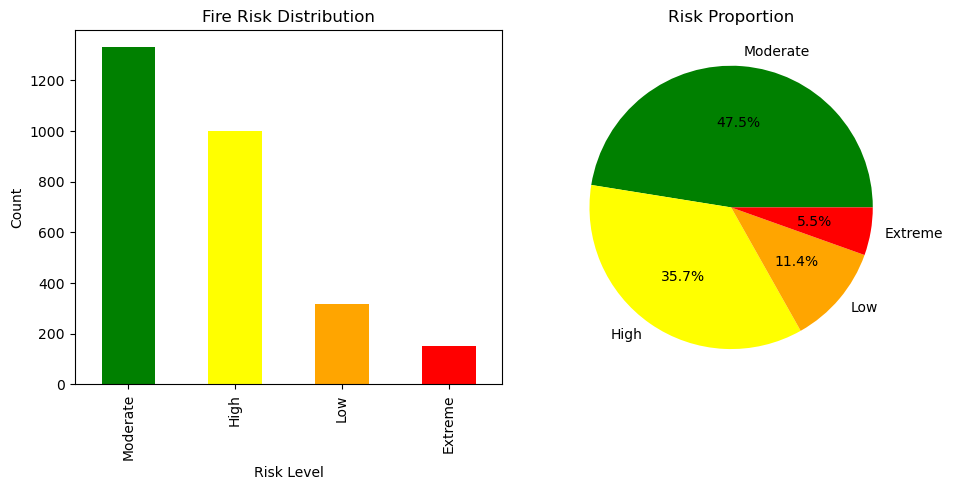

In [54]:
# Show distribution
print("\n Risk Distribution:")
risk_dist = df['Risk_Level'].value_counts()
print(risk_dist)

# Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
risk_dist.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Fire Risk Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
risk_dist.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow', 'orange', 'red'])
plt.title('Risk Proportion')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### Data Visualization

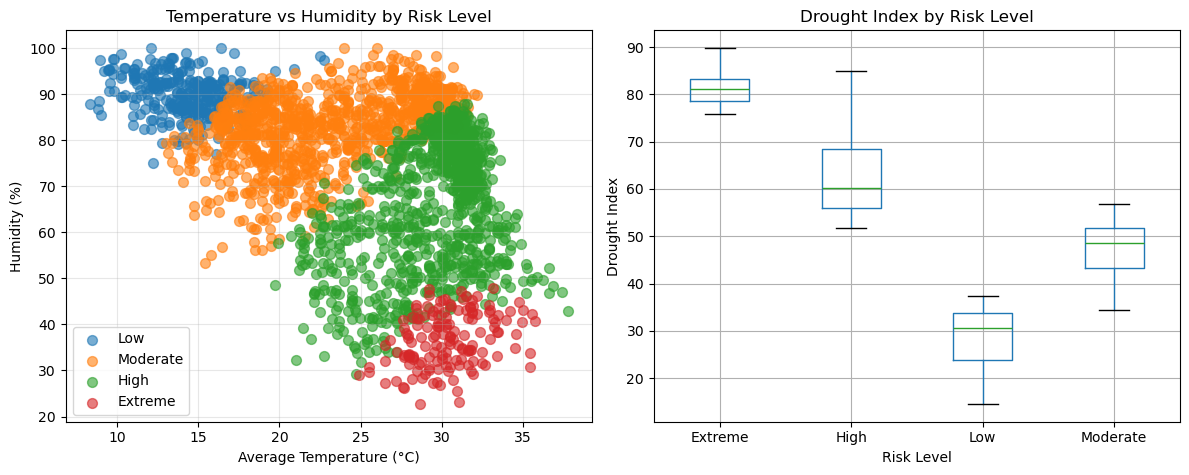

In [57]:
# 1. Temperature vs Humidity by Risk
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for risk in ['Low', 'Moderate', 'High', 'Extreme']:
    subset = df[df['Risk_Level'] == risk]
    plt.scatter(subset['Temp_Avg'], subset['Humidity'], 
               label=risk, alpha=0.6, s=50)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity by Risk Level')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df.boxplot(column='Drought_Index', by='Risk_Level', ax=plt.gca())
plt.suptitle('')
plt.title('Drought Index by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Drought Index')

plt.tight_layout()
plt.show()


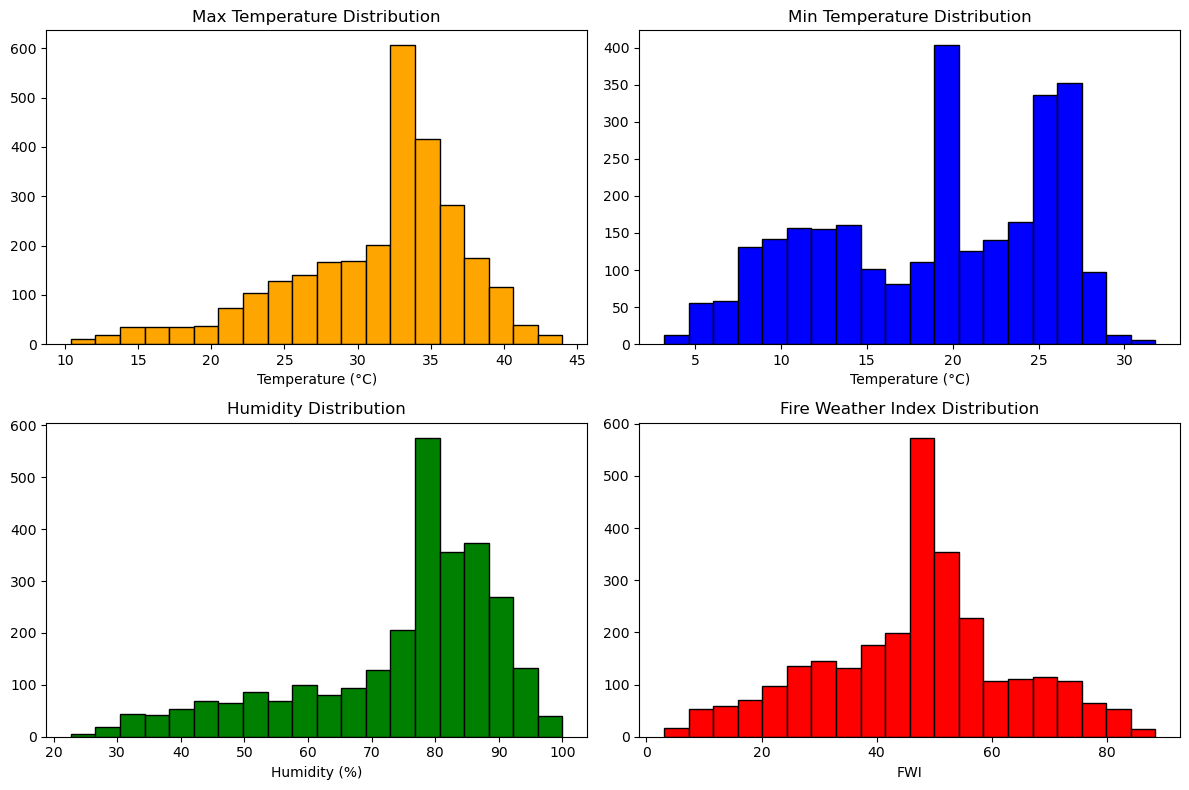

Visualizations complete!


In [59]:

# 2. Feature Distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(df['Max_Temp'], bins=20, color='orange', edgecolor='black')
axes[0, 0].set_title('Max Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (°C)')

axes[0, 1].hist(df['Min_Temp'], bins=20, color='blue', edgecolor='black')
axes[0, 1].set_title('Min Temperature Distribution')
axes[0, 1].set_xlabel('Temperature (°C)')

axes[1, 0].hist(df['Humidity'], bins=20, color='green', edgecolor='black')
axes[1, 0].set_title('Humidity Distribution')
axes[1, 0].set_xlabel('Humidity (%)')

axes[1, 1].hist(df['Fire_Weather_Index'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Fire Weather Index Distribution')
axes[1, 1].set_xlabel('FWI')

plt.tight_layout()
plt.show()

print("Visualizations complete!")

#### Prepare data for Machine Learning

In [62]:
# Select features (X) and target (y)
features = ['Max_Temp', 'Min_Temp', 'Humidity', 'Temp_Range', 
            'Temp_Avg', 'Drought_Index', 'Month', 'Day_of_Year', 'Ward']

X = df[features].copy()
y = df['Risk_Code'].copy()

# Handle any remaining NaN
X = X.fillna(0)

print(f" Features (X): {X.shape}")
print(f" Target (y): {y.shape}")

print(f"\nFeatures we're using: {features}")
print(f"\nTarget classes:")
for i, risk in enumerate(['Low', 'Moderate', 'High', 'Extreme']):
    count = (y == i).sum()
    print(f"  {risk} ({i}): {count} samples")

X.head()

 Features (X): (2804, 9)
 Target (y): (2804,)

Features we're using: ['Max_Temp', 'Min_Temp', 'Humidity', 'Temp_Range', 'Temp_Avg', 'Drought_Index', 'Month', 'Day_of_Year', 'Ward']

Target classes:
  Low (0): 319 samples
  Moderate (1): 1331 samples
  High (2): 1001 samples
  Extreme (3): 153 samples


,Max_Temp,Min_Temp,Humidity,Temp_Range,Temp_Avg,Drought_Index,Month,Day_of_Year,Ward
0,22.8,6.0,73.6,16.8,14.40,40.800000,1,1,4
1,23.4,4.8,86.6,18.6,14.10,34.800000,1,2,6
2,22.4,4.5,87.8,17.9,13.45,32.983333,1,3,6
3,22.5,7.0,81.8,15.5,14.75,36.516667,1,4,9
4,23.4,7.0,79.7,16.4,15.20,38.616667,1,5,9


#### Train and Test Data

In [67]:
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y  # Keep same proportion of each class
)

print(f" Data split complete!")
print(f"\nTraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Features scaled!")

 Data split complete!

Training set: 2243 samples (80.0%)
Test set: 561 samples (20.0%)

 Features scaled!


### Model 1- Logistic Regression

 Logistic Regression trained!
 Test Accuracy: 96.79%


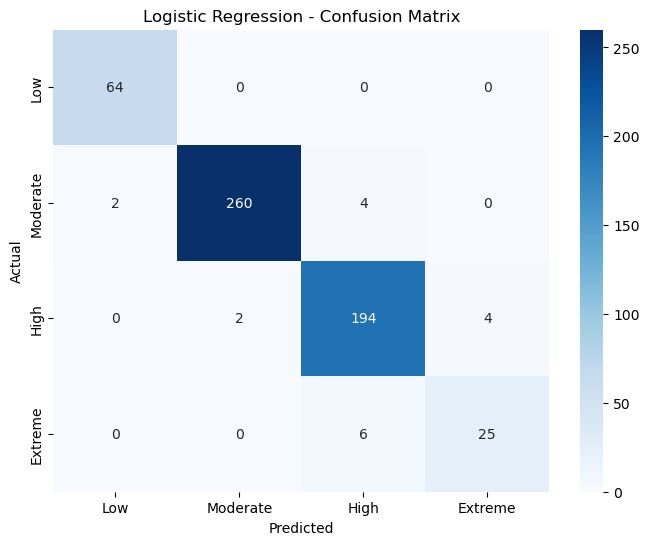


 Classification Report:
              precision    recall  f1-score   support

         Low       0.97      1.00      0.98        64
    Moderate       0.99      0.98      0.98       266
        High       0.95      0.97      0.96       200
     Extreme       0.86      0.81      0.83        31

    accuracy                           0.97       561
   macro avg       0.94      0.94      0.94       561
weighted avg       0.97      0.97      0.97       561


 Cross-Validation Score: 95.63% (+/- 1.28%)


In [70]:

# Create and train model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f" Logistic Regression trained!")
print(f" Test Accuracy: {lr_accuracy*100:.2f}%")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High', 'Extreme'],
            yticklabels=['Low', 'Moderate', 'High', 'Extreme'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lr, 
                           target_names=['Low', 'Moderate', 'High', 'Extreme']))

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"\n Cross-Validation Score: {cv_scores_lr.mean()*100:.2f}% (+/- {cv_scores_lr.std()*100:.2f}%)")

### Model 2 - Random Forest

Random Forest trained!
Test Accuracy: 98.04%


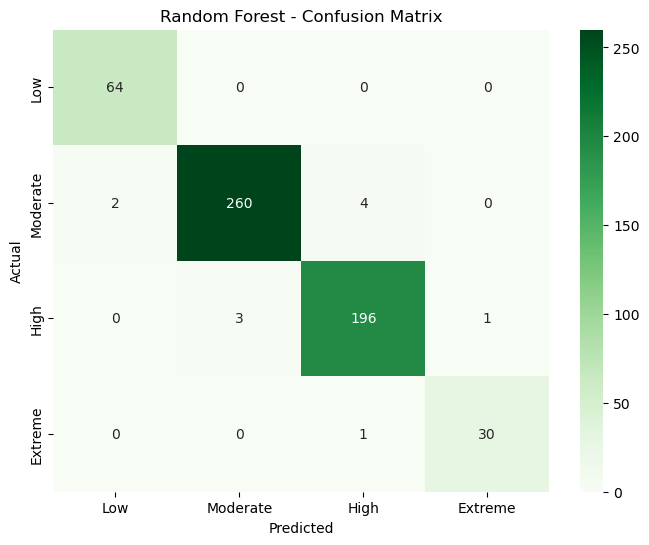


 Classification Report:
              precision    recall  f1-score   support

         Low       0.97      1.00      0.98        64
    Moderate       0.99      0.98      0.98       266
        High       0.98      0.98      0.98       200
     Extreme       0.97      0.97      0.97        31

    accuracy                           0.98       561
   macro avg       0.98      0.98      0.98       561
weighted avg       0.98      0.98      0.98       561


 Cross-Validation Score: 98.31% (+/- 0.59%)

 Top 5 Important Features:
         Feature  Importance
5  Drought_Index    0.419585
0       Max_Temp    0.238104
2       Humidity    0.149990
4       Temp_Avg    0.091327
1       Min_Temp    0.037214


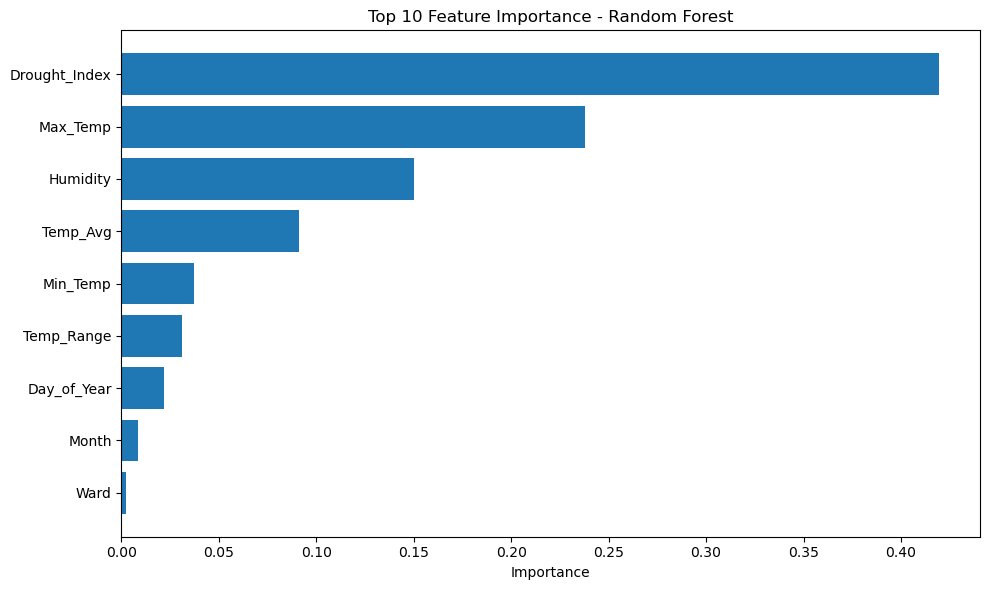

In [73]:
# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest trained!")
print(f"Test Accuracy: {rf_accuracy*100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Moderate', 'High', 'Extreme'],
            yticklabels=['Low', 'Moderate', 'High', 'Extreme'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf,
                           target_names=['Low', 'Moderate', 'High', 'Extreme']))

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\n Cross-Validation Score: {cv_scores_rf.mean()*100:.2f}% (+/- {cv_scores_rf.std()*100:.2f}%)")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 5 Important Features:")
print(feature_importance.head())

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Model 3- XGBoost( Best Performance)

 XGBoost trained!
 Test Accuracy: 98.22%


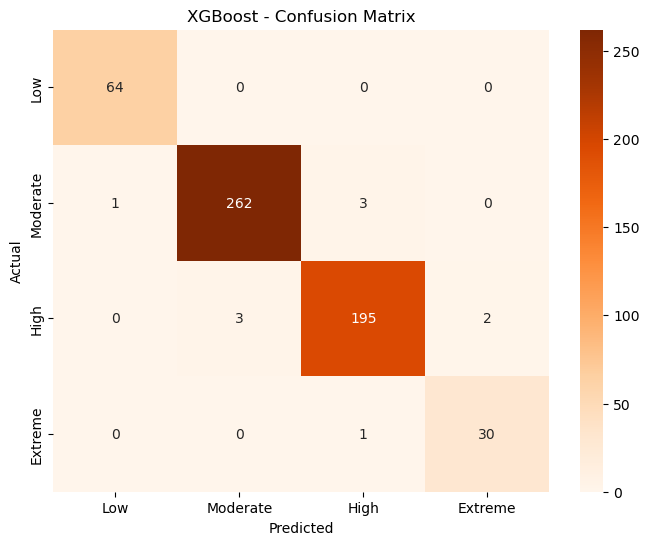


 Classification Report:
              precision    recall  f1-score   support

         Low       0.98      1.00      0.99        64
    Moderate       0.99      0.98      0.99       266
        High       0.98      0.97      0.98       200
     Extreme       0.94      0.97      0.95        31

    accuracy                           0.98       561
   macro avg       0.97      0.98      0.98       561
weighted avg       0.98      0.98      0.98       561


 Cross-Validation Score: 97.95% (+/- 1.23%)

 Top 5 Important Features:
         Feature  Importance
5  Drought_Index    0.717077
0       Max_Temp    0.074570
2       Humidity    0.059631
1       Min_Temp    0.041959
4       Temp_Avg    0.035117


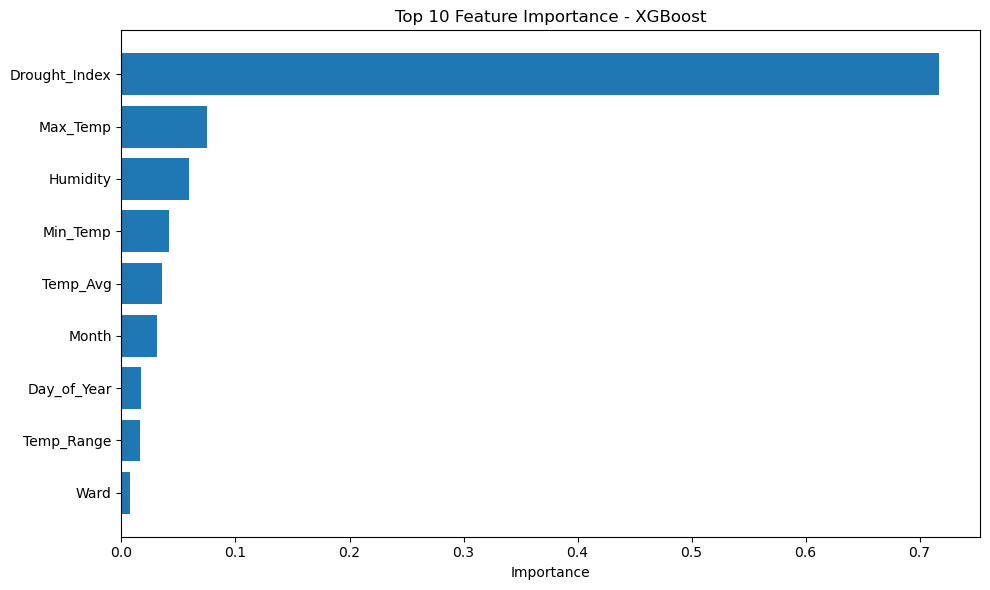

In [76]:
# Create and train model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f" XGBoost trained!")
print(f" Test Accuracy: {xgb_accuracy*100:.2f}%")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Moderate', 'High', 'Extreme'],
            yticklabels=['Low', 'Moderate', 'High', 'Extreme'])
plt.title('XGBoost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb,
                           target_names=['Low', 'Moderate', 'High', 'Extreme']))

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"\n Cross-Validation Score: {cv_scores_xgb.mean()*100:.2f}% (+/- {cv_scores_xgb.std()*100:.2f}%)")

# Feature Importance
feature_importance_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 5 Important Features:")
print(feature_importance_xgb.head())

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgb['Feature'][:10], feature_importance_xgb['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Compare All 3 models


 Model Comparison:
              Model  Test Accuracy   CV Mean   CV Std
Logistic Regression      96.791444 95.631463 1.278848
      Random Forest      98.039216 98.305560 0.591883
            XGBoost      98.217469 97.949113 1.231319


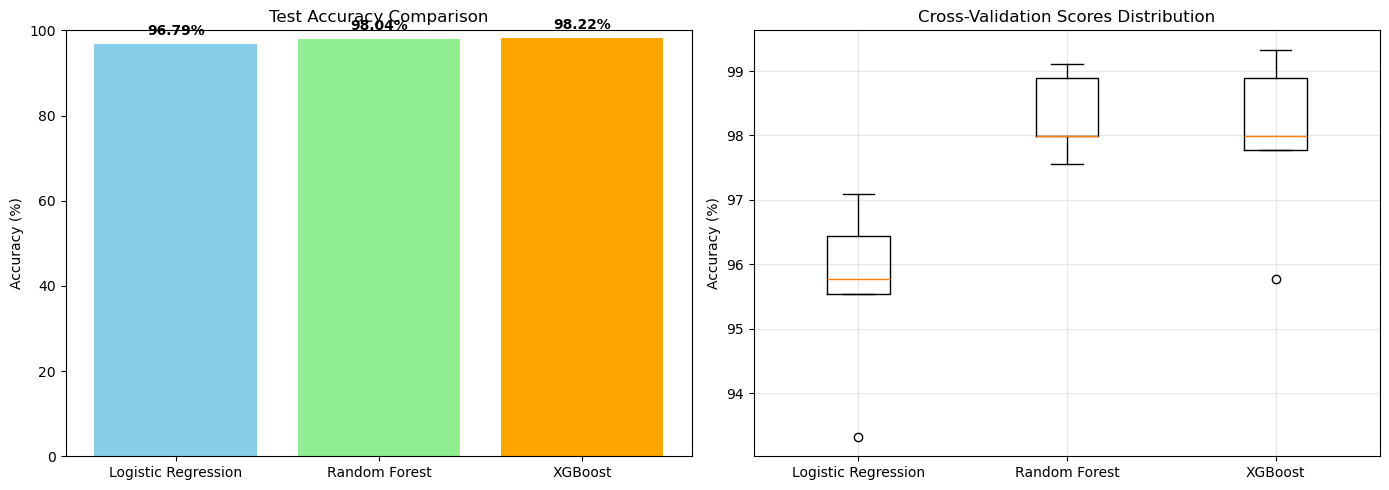


 BEST MODEL: XGBoost
   Accuracy: 98.22%

 Best model selected for deployment!


In [81]:
# Create comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Test Accuracy': [lr_accuracy*100, rf_accuracy*100, xgb_accuracy*100],
    'CV Mean': [cv_scores_lr.mean()*100, cv_scores_rf.mean()*100, cv_scores_xgb.mean()*100],
    'CV Std': [cv_scores_lr.std()*100, cv_scores_rf.std()*100, cv_scores_xgb.std()*100]
})

print("\n Model Comparison:")
print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
models = comparison['Model']
accuracies = comparison['Test Accuracy']

axes[0].bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange'])
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylim([0, 100])
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 2, f'{v:.2f}%', ha='center', fontweight='bold')

# CV scores
cv_data = [cv_scores_lr*100, cv_scores_rf*100, cv_scores_xgb*100]
axes[1].boxplot(cv_data, labels=models)
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Cross-Validation Scores Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Determine best model
best_idx = comparison['Test Accuracy'].idxmax()
best_model_name = comparison.loc[best_idx, 'Model']
best_accuracy = comparison.loc[best_idx, 'Test Accuracy']

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.2f}%")

# Select best model
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    X_for_prediction = X_test_scaled
elif best_model_name == 'Random Forest':
    best_model = rf_model
    X_for_prediction = X_test
else:
    best_model = xgb_model
    X_for_prediction = X_test

print(f"\n Best model selected for deployment!")

### Prediction Function

In [84]:
def predict_fire_risk_simple(max_temp, min_temp, humidity, month=1, ward=1):
    """
    Predict fire risk based on weather conditions
    
    Parameters:
    -----------
    max_temp : Maximum temperature in °C
    min_temp : Minimum temperature in °C
    humidity : Humidity percentage (0-100)
    month : Month (1-12)
    ward : Ward number
    
    Returns:
    --------
    Risk level and details
    """
    # Calculate features
    temp_range = max_temp - min_temp
    temp_avg = (max_temp + min_temp) / 2
    day_of_year = month * 30
    drought_index = (temp_avg / 30 * 0.4 + 
                    (100 - humidity) / 100 * 0.5 + 
                    temp_range / 20 * 0.1) * 100
    
    # Create feature array
    new_data = pd.DataFrame({
        'Max_Temp': [max_temp],
        'Min_Temp': [min_temp],
        'Humidity': [humidity],
        'Temp_Range': [temp_range],
        'Temp_Avg': [temp_avg],
        'Drought_Index': [drought_index],
        'Month': [month],
        'Day_of_Year': [day_of_year],
        'Ward': [ward]
    })
    
    # Make prediction with best model
    if best_model_name == 'Logistic Regression':
        new_data_scaled = scaler.transform(new_data)
        prediction = best_model.predict(new_data_scaled)[0]
        probabilities = best_model.predict_proba(new_data_scaled)[0]
    else:
        prediction = best_model.predict(new_data)[0]
        probabilities = best_model.predict_proba(new_data)[0]
    
    # Get risk name
    risk_names = ['Low', 'Moderate', 'High', 'Extreme']
    risk_level = risk_names[prediction]
    confidence = probabilities[prediction] * 100
    
    # Calculate Fire Weather Index
    if temp_avg < 15:
        temp_score = 0
    elif temp_avg < 25:
        temp_score = (temp_avg - 15) * 2
    else:
        temp_score = 20 + min((temp_avg - 25) * 2, 10)
    
    humidity_score = (100 - humidity) * 0.4
    range_score = min(temp_range * 0.75, 15)
    drought_score = drought_index * 0.15
    fwi = temp_score + humidity_score + range_score + drought_score
    
    # Return results
    return {
        'Risk_Level': risk_level,
        'Confidence': f'{confidence:.1f}%',
        'Fire_Weather_Index': f'{fwi:.1f}',
        'Drought_Index': f'{drought_index:.1f}',
        'Input': {
            'Max_Temp': f'{max_temp}°C',
            'Min_Temp': f'{min_temp}°C',
            'Humidity': f'{humidity}%',
            'Month': month
        },
        'All_Probabilities': {
            'Low': f'{probabilities[0]*100:.1f}%',
            'Moderate': f'{probabilities[1]*100:.1f}%' if len(probabilities) > 1 else '0%',
            'High': f'{probabilities[2]*100:.1f}%' if len(probabilities) > 2 else '0%',
            'Extreme': f'{probabilities[3]*100:.1f}%' if len(probabilities) > 3 else '0%'
        }
    }

print("Prediction function created!")

Prediction function created!


In [88]:
### Test Prediction

# Test Case 1: High Risk
print("\n TEST 1: HIGH RISK SCENARIO")
print("-" * 50)
result1 = predict_fire_risk_simple(
    max_temp=32,
    min_temp=18,
    humidity=30,
    month=4
)

print(f"Input: Max={result1['Input']['Max_Temp']}, Min={result1['Input']['Min_Temp']}, "
      f"Humidity={result1['Input']['Humidity']}, Month={result1['Input']['Month']}")
print(f"\n PREDICTION: {result1['Risk_Level']}")
print(f"   Confidence: {result1['Confidence']}")
print(f"   Fire Weather Index: {result1['Fire_Weather_Index']}")
print(f"   Drought Index: {result1['Drought_Index']}")
print(f"\n All Probabilities:")
for risk, prob in result1['All_Probabilities'].items():
    print(f"   {risk}: {prob}")

# Test Case 2: Low Risk
print("\n\n TEST 2: LOW RISK SCENARIO")
print("-" * 50)
result2 = predict_fire_risk_simple(
    max_temp=20,
    min_temp=12,
    humidity=80,
    month=7
)

print(f"Input: Max={result2['Input']['Max_Temp']}, Min={result2['Input']['Min_Temp']}, "
      f"Humidity={result2['Input']['Humidity']}, Month={result2['Input']['Month']}")
print(f"\n PREDICTION: {result2['Risk_Level']}")
print(f"   Confidence: {result2['Confidence']}")
print(f"   Fire Weather Index: {result2['Fire_Weather_Index']}")
print(f"   Drought Index: {result2['Drought_Index']}")
print(f"\n All Probabilities:")
for risk, prob in result2['All_Probabilities'].items():
    print(f"   {risk}: {prob}")

# Test Case 3: Your Custom Input
print("\n\n TEST 3: CUSTOM INPUT (Change these values!)")
print("-" * 50)
result3 = predict_fire_risk_simple(
    max_temp=25,      # Change this
    min_temp=15,      # Change this
    humidity=50,      # Change this
    month=3           #  Change this
)

print(f"Input: Max={result3['Input']['Max_Temp']}, Min={result3['Input']['Min_Temp']}, "
      f"Humidity={result3['Input']['Humidity']}, Month={result3['Input']['Month']}")
print(f"\n PREDICTION: {result3['Risk_Level']}")
print(f"   Confidence: {result3['Confidence']}")
print(f"   Fire Weather Index: {result3['Fire_Weather_Index']}")
print(f"   Drought Index: {result3['Drought_Index']}")
print(f"\n All Probabilities:")
for risk, prob in result3['All_Probabilities'].items():
    print(f"   {risk}: {prob}")

print("\n All predictions complete!")


 TEST 1: HIGH RISK SCENARIO
--------------------------------------------------
Input: Max=32°C, Min=18°C, Humidity=30%, Month=4

 PREDICTION: High
   Confidence: 99.9%
   Fire Weather Index: 69.8
   Drought Index: 75.3

 All Probabilities:
   Low: 0.0%
   Moderate: 0.0%
   High: 99.9%
   Extreme: 0.0%


 TEST 2: LOW RISK SCENARIO
--------------------------------------------------
Input: Max=20°C, Min=12°C, Humidity=80%, Month=7

 PREDICTION: Low
   Confidence: 99.8%
   Fire Weather Index: 21.3
   Drought Index: 35.3

 All Probabilities:
   Low: 99.8%
   Moderate: 0.2%
   High: 0.0%
   Extreme: 0.0%


 TEST 3: CUSTOM INPUT (Change these values!)
--------------------------------------------------
Input: Max=25°C, Min=15°C, Humidity=50%, Month=3

 PREDICTION: Moderate
   Confidence: 90.3%
   Fire Weather Index: 46.0
   Drought Index: 56.7

 All Probabilities:
   Low: 0.1%
   Moderate: 90.3%
   High: 9.5%
   Extreme: 0.1%

 All predictions complete!


In [96]:

print(f"\n DATASET STATISTICS:")
print(f"   Total samples: {len(df)}")
print(f"   Features used: {len(features)}")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")

print(f"\n RISK DISTRIBUTION:")
for risk in ['Low', 'Moderate', 'High', 'Extreme']:
    count = (df['Risk_Level'] == risk).sum()
    percentage = count / len(df) * 100
    print(f"   {risk:12s}: {count:4d} ({percentage:5.1f}%)")

print(f"\n MODEL PERFORMANCE:")
print(f"   1. Logistic Regression: {lr_accuracy*100:.2f}%")
print(f"   2. Random Forest:       {rf_accuracy*100:.2f}%")
print(f"   3. XGBoost:             {xgb_accuracy*100:.2f}%")

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_accuracy:.2f}%")

print(f"\n TOP 3 MOST IMPORTANT FEATURES:")
if best_model_name == 'Random Forest':
    top_features = feature_importance.head(3)
else:
    top_features = feature_importance_xgb.head(3)

for idx, row in top_features.iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")




 DATASET STATISTICS:
   Total samples: 2804
   Features used: 9
   Training samples: 2243
   Test samples: 561

 RISK DISTRIBUTION:
   Low         :  319 ( 11.4%)
   Moderate    : 1331 ( 47.5%)
   High        : 1001 ( 35.7%)
   Extreme     :  153 (  5.5%)

 MODEL PERFORMANCE:
   1. Logistic Regression: 96.79%
   2. Random Forest:       98.04%
   3. XGBoost:             98.22%

 BEST MODEL: XGBoost
   Test Accuracy: 98.22%

 TOP 3 MOST IMPORTANT FEATURES:
   6. Drought_Index: 0.7171
   1. Max_Temp: 0.0746
   3. Humidity: 0.0596
